In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

In [30]:
# true_positions = np.array([0.0, 1.0, 1+2**(1/12) , 1+2**(1/12) +]) 

num_true_lines = 4
first_spacing = 1
n = np.arange(num_true_lines)


def get_true_pos(num_true_lines, first_spacing=1.0):
    scale_length = first_spacing / (1 - 2**(-1/12))
    
    n = np.arange(num_true_lines)
    
    # Calculate fret positions using the guitar fret formula
    true_pos = scale_length * (1 - 2**(-n/12))
    
    return true_pos
true_positions = get_true_pos(num_true_lines, first_spacing=first_spacing)
print(true_positions)

# Simulate some perspective parameters (these will be what we try to recover)
actual_a, actual_b, actual_c, actual_d = 1.0, 0.0, 0.3, 1.0

[0.         1.         1.94387431 2.83477303]


In [49]:
def mobius_transform(x, a, b, c, d):
    """Möbius transformation: f(x) = (ax + b) / (cx + d)"""
    return (a * x + b) / (c * x + d)

def inverse_mobius_transform(observed_pos, a, b, c, d):
    """
    Given observed positions and Möbius parameters a,b,c,d,
    recover the true positions.
    """
    true_pos = (d * observed_pos - b) / (a - c * observed_pos)
    return true_pos


In [32]:
observed_positions = mobius_transform(true_positions, actual_a, actual_b, actual_c, actual_d)

In [41]:




def estimate_mobius_params(observed, num_true_lines=4):
    """
    Estimate Möbius transformation parameters from observed positions.
    
    Assumes the true positions are equally spaced starting from 0.
    Uses the constraint that Möbius transformations form a 3-parameter family (up to scaling).
    We can normalize by setting d=1.
    """
    # True positions (equally spaced, parallel when face-on)
    true_pos = get_true_pos(num_true_lines, first_spacing=first_spacing)
    
    # Define residual function
    def residuals(params):
        a, b, c = params
        d = 1.0  # Normalize
        predicted = mobius_transform(true_pos, a, b, c, d)
        return predicted - observed
    
    # Initial guess
    x0 = [1.0, 0.0, 0.0]
    
    # Solve
    result = least_squares(residuals, x0, method='lm')
    
    a, b, c = result.x
    d = 1.0
    
    return a, b, c, d, result


a,b,c,d ,result = estimate_mobius_params(observed_positions)
print(a,b,c,d,result)

1.0000000000000002 -1.1357014803492378e-17 0.3000000000000001 1.0      message: `xtol` termination condition is satisfied.
     success: True
      status: 3
         fun: [-1.136e-17  2.220e-16  0.000e+00 -2.220e-16]
           x: [ 1.000e+00 -1.136e-17  3.000e-01]
        cost: 4.936829746893661e-32
         jac: [[ 0.000e+00  1.000e+00  0.000e+00]
               [ 7.692e-01  7.692e-01 -5.917e-01]
               [ 1.228e+00  6.316e-01 -1.508e+00]
               [ 1.532e+00  5.404e-01 -2.347e+00]]
        grad: [-1.694e-16  3.945e-17  3.897e-16]
  optimality: 3.8972407268974393e-16
 active_mask: [0 0 0]
        nfev: 7
        njev: None


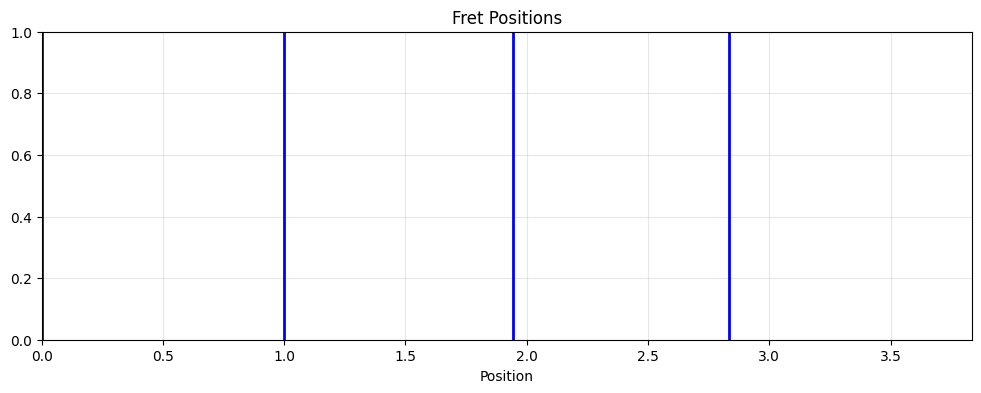

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Get fret positions
num_frets = 4
first_spacing = 1
scale_length = first_spacing / (1 - 2**(-1/12))
true_pos = get_true_pos(num_frets, first_spacing)

def draw_lines(positions):

    # Plot vertical lines
    fig, ax = plt.subplots(figsize=(12, 4))

    for pos in positions:
        ax.axvline(x=pos, color='blue', linewidth=2)

    ax.set_xlim(0, positions[-1] + 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel('Position')
    ax.set_title('Fret Positions')
    ax.grid(True, alpha=0.3)
    plt.show()

draw_lines(true_pos)

[0.         0.76923077 1.22784273 1.53195209]


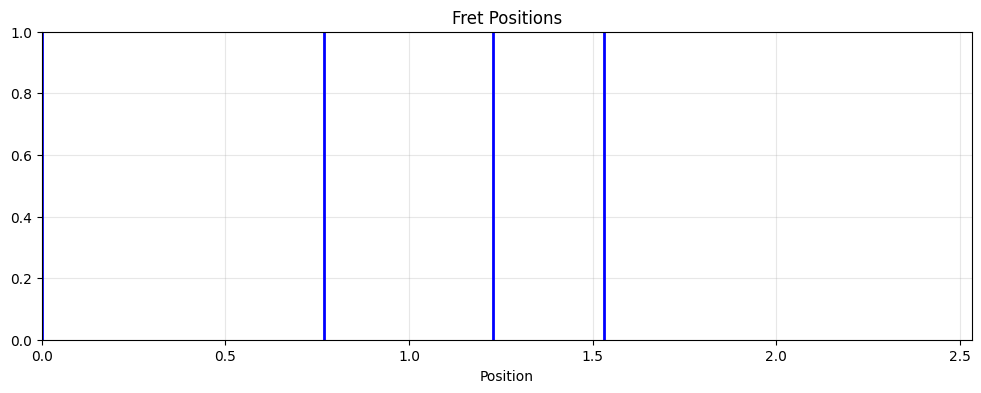

In [48]:
# Simulate some perspective parameters (these will be what we try to recover)
actual_a, actual_b, actual_c, actual_d = 1.0, 0.0, 0.3, 1.0

observed_positions = mobius_transform(true_positions, actual_a, actual_b, actual_c, actual_d)
print(observed_positions)
draw_lines(observed_positions)

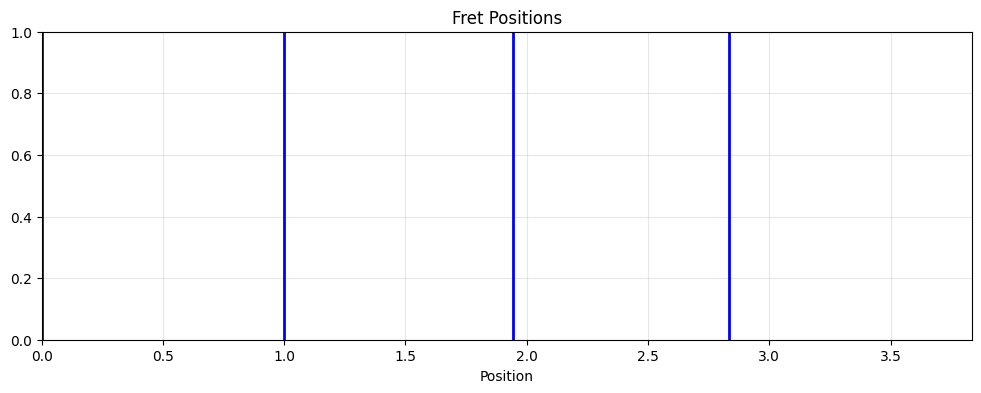

In [51]:
a,b,c,d, _ = estimate_mobius_params(observed_positions)

simulated_real_pos = inverse_mobius_transform(observed_positions,a,b,c,d)

draw_lines(simulated_real_pos)